In [1]:
import xarray as xr
from cartopy import crs,feature
import numpy as np
import matplotlib.pyplot as plt

import datetime

In [2]:
ls

2m_dew_point_temperature.nc         dew_point.py       Temp_wind_data.nc
Animation_Files_90/                 download.py        Untitled.ipynb
cru_ts4.07.1901.2022.pre.dat.nc     global_precip.gif  UV_wind_component.nc
cru_ts4.07.1901.2022.pre.dat.nc.gz  preci.nc           West_africa_Clim_data.nc
cru_ts4.07.1901.2022.tmp.dat.nc     prof_data/         wind_uv_component.py
cru_ts4.07.1901.2022.tmp.dat.nc.gz  Temperature_2m.py


In [3]:
ds = xr.open_dataset('cru_ts4.07.1901.2022.pre.dat.nc')
dt = xr.open_dataset('cru_ts4.07.1901.2022.tmp.dat.nc')


In [4]:
def anomaly(ds, freq)-> ds:
    return (ds-ds.mean(freq))/ds.std(freq)
    

In [5]:
ds1 = anomaly(ds.groupby('time.year').sum('time')['pre'], freq='year')
dt1 = anomaly(dt.groupby('time.year').mean('time')['tmp'], freq='year')

#ds1.to_netcdf('preci.nc')

In [6]:
Global_dt = dt1.mean(['lon','lat'])
Global_ds = ds1.mean(['lon','lat'])
Africa_dt = dt1.sel(lon = slice(-20,52), lat=slice(-35,38)).mean(['lon','lat'])
Africa_ds = ds1.sel(lon = slice(-20,52), lat=slice(-35,38)).mean(['lon','lat'])
Ghana_dt = dt1.sel(lon = slice(-3.5,1.5), lat=slice(4,12)).mean(['lon','lat'])
Ghana_ds = ds1.sel(lon = slice(-3.5,1.5), lat=slice(4,12)).mean(['lon','lat'])


# Spatial Plots

In [7]:
# dt_p.values[-1]
dt1

<xarray.DataArray 'tmp' (year: 122, lat: 360, lon: 720)>
array([[[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
...
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]],

       [[nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]], dtype=float32)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * year     (year) int64 1901 1902 1903 1904 1905 ... 2018 2019 2020 2021 2022

In [25]:
rr_blank = np.zeros([3,times_x.size])
rr_blank[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.])

In [80]:
%%time

times_x = ds1.year.data
tt_blank = np.ones([3,times_x.size])*np.nan
rr_blank = np.zeros(times_x.size)

for j,year in enumerate(ds1.year.data[:]):
    for i, cl in enumerate(range(360, -10, -90)):
        plt.figure(figsize=(25,15))
        plt.subplots_adjust(hspace=0.5, wspace=0.5)
        ax = plt.subplot(221, projection=crs.Robinson(central_longitude=cl))
        dt1.sel(year=year).rename('Temperature Anomaly [$^o$C]').plot(ax=ax, vmin=-1, vmax=1, cmap='coolwarm', transform=crs.PlateCarree())
        
        ax.set_title('Temperature Anomaly', fontsize=25)
        
        ax = plt.subplot6.(222)
        
        colors=['r','g','b']
        regions = ['Global','Africa']
        for r, reg in enumerate(regions):
            if j==0:
                ds_slice = eval(reg+'_dt').sel(year=year)
            else:
                ds_slice = eval(reg+'_dt').sel(year=slice(None, year))
            
            tt_blank[r, :ds_slice.size]=ds_slice.values
            ax.plot(range(len(tt_blank[r])), tt_blank[r], color=colors[r], label=reg) 
        
        ax.set_ylim(-2.5, 2.5)
        ax.set_yticks(np.arange(-2.5, 2.51, 0.5), np.arange(-2.5, 2.51, 0.5), fontsize=20)
        ax.set_ylabel('Temperature Anomaly ($^o$C)', fontsize=20)
        ax.legend(loc='upper left', ncol=3, fontsize=18)
                  
        ax.set_xticks(range(Global_dt.size+2)[::5],range(1901,2023)[::5], rotation=90,fontsize=20)
        ax.set_xlim(-2, Global_dt.size+2)
        ax.axhline(y=0, color='k')
        ax.axhline(y=1, color='k', linestyle='dashed')
        ax.axhline(y=1.5, color='k', linestyle='dashed')
#         ax.set_title('Temperature Anomaly', fontsize=25)
        plt.suptitle(f'{year}', fontsize=30)
        
        

        ax = plt.subplot(223, projection=crs.Robinson(central_longitude=cl))
        ds1.sel(year=year).rename('Rainfall Anomaly [mm]').plot(ax=ax, vmin=-1, vmax=1, cmap='coolwarm_r', transform=crs.PlateCarree())
        
        ax.set_title('Rainfall Anomaly', fontsize=25)

        ax = plt.subplot(224)

        colors=['r','g','b']
        regions = ['Global','Africa']
        for r, reg in enumerate(regions):
            if j==0:
                ds_slice = eval(reg+'_ds').sel(year=year)
            else:
                ds_slice = eval(reg+'_ds').sel(year=slice(None, year))

            tt_blank[r, :ds_slice.size]=ds_slice.values
            ax.plot(range(len(tt_blank[r])), tt_blank[r], color=colors[r], label=reg) 


        ax.set_ylim(-1, 1)
        ax.legend(loc='upper left', ncol=3, fontsize=18)

        
        ax.set_xticks(range(Global_dt.size)[::5],range(1901,2023)[::5], rotation=90,fontsize=20)
        ax.set_xlim(-2, Global_dt.size+2)
        ax.axhline(y=0, color='k')
#         ax.set_title('Rainfall Anomaly', fontsize=25)
        ax.set_yticks(np.arange(-1, 1.1, 0.25), np.arange(-1, 1.1, 0.25), fontsize=20)
        ax.set_ylabel('Rainfall Anomaly (mm)', fontsize=20)
        plt.suptitle(f'{year}', fontsize=30)
        
        
        
        plt.savefig('Animation_Files_90/{}_{}_lon_{:003d}.jpg'.format(year, i, cl), facecolor='gray')
        plt.close()
        
        
        


#!convert -delay 30 -loop 0 "Animation_Files"/*.png global_precip.gif

CPU times: user 20min 32s, sys: 5min 18s, total: 25min 51s
Wall time: 57min 30s


In [64]:
%%time

times_x = ds1.year.data
tt_blank = np.ones([3,times_x.size])*np.nan
rr_blank = np.ones([3,times_x.size])*np.nan

for j,year in enumerate(ds1.year.data[:2]):
    for i, cl in enumerate(range(360, -10, -90)):
        plt.figure(figsize=(25,15))
        ax = plt.subplot(221, projection=crs.Robinson(central_longitude=cl))
        dt1.sel(year=year).plot(ax=ax, vmin=-1, vmax=1, cmap='coolwarm', transform=crs.PlateCarree())
        
        ax.set_title('Temperature Anomaly', fontsize=30)
        
        ax = plt.subplot(222)
        
        colors=['r','g','b']
        regions = ['Global','Africa','Ghana']
        for r, reg in enumerate(regions):
            if j==0:
                ds_slice = eval(reg+'_dt').sel(year=year)
            else:
                ds_slice = eval(reg+'_dt').sel(year=slice(None, year))
                #global_slice = Global_dt.sel(year=slice(None, year))
                #ds_slice.plot(ax = ax)#marker='o', lw=0)
            
            tt_blank[r, :ds_slice.size]=ds_slice.values
            ax.plot(range(len(tt_blank[r])), tt_blank[r], color=colors[r], label=reg) 
                #Africa_dt.plot(color='g', ax = ax)
                #Ghana_dt.plot(color='b', ax = ax)
        
        ax.set_ylim(-2, 2)
        ax.legend(loc='upper left', ncol=3, fontsize=18)
        #ax.set_xlim(datetime.datetime(1901,1,1), datetime.datetime(2022,12,31))
        
               
        ax.set_xticks(range(-4,Global_dt.size)[5::5],range(1901,2023)[::5], rotation=75)
        plt.suptitle(f'{year}', fontsize=30)
        
        '''
        dt_p = dt1.mean(['lon','lat']).sel(year=slice(None,year))
        dt_p1 = dt1.sel(lon = slice(-20,52), lat=slice(-35,38)).mean(['lon','lat'])
        
        if i==0:
            tt_blank[j] = dt_p.values[-1]
        ax.plot(range(len(tt_blank)), tt_blank) 
        ax.set_ylim(-2, 2)
        #ax.set_title('Temperature Anomaly', fontsize=20)
        #plt.suptitle(f'{year}', fontsize=30)
        tt_blank[j] = dt_p.values[-1]
        ax.plot(range(len(tt_blank)), tt_blank) 
        
        ax = plt.subplot(223, projection=crs.Robinson(central_longitude=cl))
        ds1.sel(year=year).plot(ax=ax, vmin=-3, vmax=3, cmap='magma', transform=crs.PlateCarree())
        
        ax.set_title('Rainfall Anomaly', fontsize=20)

        
        ax = plt.subplot(224)
        ds_p = ds1.mean(['lon','lat']).sel(year=slice(None,year))#.plot(ax=ax) 
        if i==0:
            rr_blank[j] = ds_p.values[-1]
        ax.plot(range(len(rr_blank)), rr_blank) 
        #ax.set_title('Temperature Anomaly', fontsize=20) 
        ax.set_ylim(-0.5, 0.5)'''
        
        plt.savefig('Animation_Files_90/{}_{}_lon_{:003d}.jpg'.format(year, i, cl), facecolor='gray')
        plt.close()
        
        
        


#!convert -delay 30 -loop 0 "Animation_Files"/*.png global_precip.gif

CPU times: user 9.64 s, sys: 1.22 s, total: 10.9 s
Wall time: 12.9 s


In [37]:
dt_p = dt1.mean(['lon','lat']).sel(year=slice(None,year))
if i==0:
    tt_blank[j] = dt_p.values
ax.plot(range(len(tt_blank)), tt_blank) 
ax.set_ylim(-1.5, 1.5)

(-1.5, 1.5)

<BarContainer object of 122 artists>

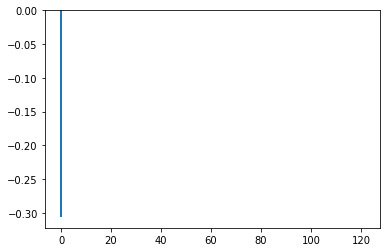

In [10]:
plt.bar(range(len(tt_blank)), tt_blank) 

In [76]:

#!convert -delay 30 -loop 0 "Animation_Files/"*.png global_precip.gif

In [59]:
crs.Robinson(central_longitude=)

'/home/receiver/Desktop/New_data'

In [56]:
2022-1901+1

122

In [66]:
#ds.groupby('time.year').sum('time').map(anomaly, freq='year')

In [69]:
regions = [
[-25, 55, -35, 37.5],
[-15, 15, 4.5, 22.5],
[-3.5, 1.5, 4.5, 11.5],
]

colors=['r','g','b']

In [70]:
mn = ds1.mean(['lon','lat'])
lower = ds1.quantile(0.05, dim=['lon','lat'])
upper = ds1.quantile(0.95, dim=['lon','lat'])


l25 = ds1.quantile(0.25, dim=['lon','lat'])
u75 = ds1.quantile(0.75, dim=['lon','lat'])

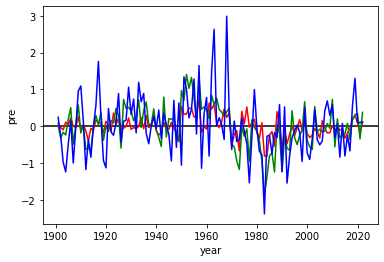

In [71]:
fig, ax = plt.subplots(ncols=1)
ax.axhline(y=0, color='k')
#ds1.mean(['lon','lat']).plot(ax=ax, color='b')

for color, region in zip(colors, regions):
    if len(region)==2:
        out = ds1.sel(lon=region[0], lat=region[1], method='nearest')
    else:
        out = ds1.sel(lon=slice(region[0],region[1]), lat=slice(region[2],region[3])).mean(['lon','lat'])
    out.plot(ax=ax, color=color)

In [4]:
ds = xr.open_dataset('preci.nc')
# time_step=1
# ds = ds.isel(year=time_step)
#.mean('year')
ds

<xarray.Dataset>
Dimensions:  (lon: 720, lat: 360, year: 122)
Coordinates:
  * lon      (lon) float32 -179.8 -179.2 -178.8 -178.2 ... 178.8 179.2 179.8
  * lat      (lat) float32 -89.75 -89.25 -88.75 -88.25 ... 88.75 89.25 89.75
  * year     (year) int64 1901 1902 1903 1904 1905 ... 2018 2019 2020 2021 2022
Data variables:
    pre      (year, lat, lon) float32 ...

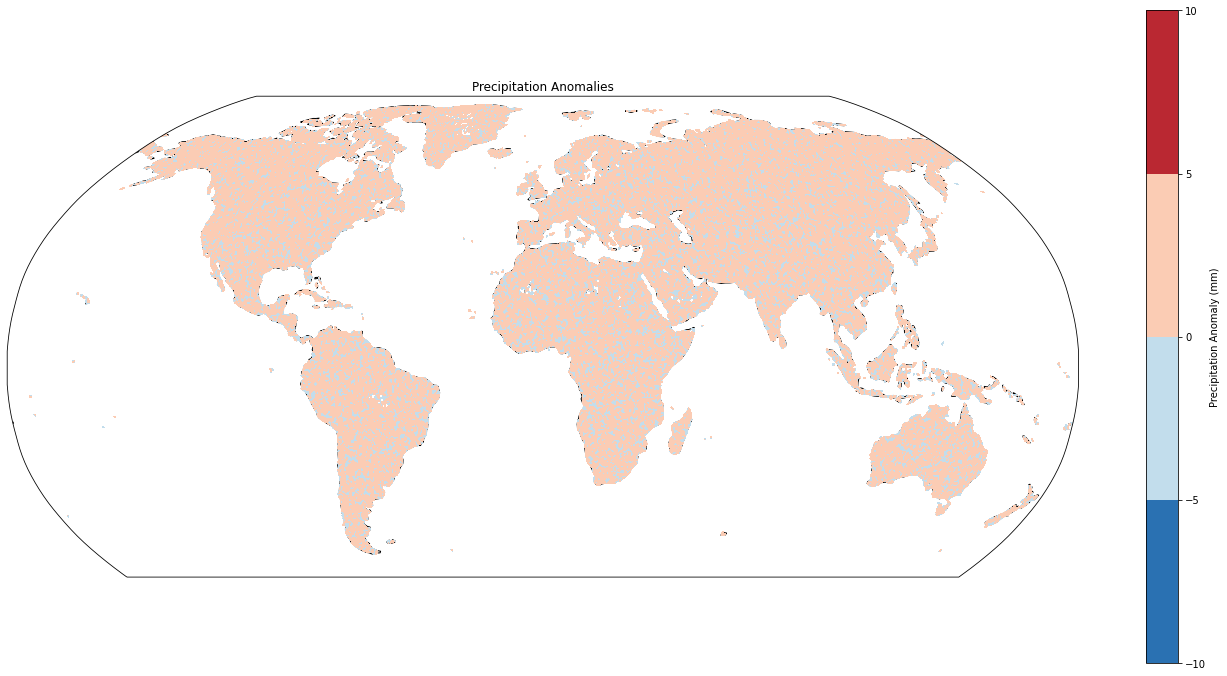

In [125]:
import cartopy.crs as ccrs
fig, ax = plt.subplots(figsize=(24,12),subplot_kw={'projection':ccrs.Robinson()})
ax.coastlines(resolution='110m', linewidth=1)
ax.add_feature(feature.BORDERS, linestyle='-', alpha=0.5)
#axes.add_feature(featur, linestyle='-',alpha=.5)
levels = [-10,-5,0,5,10]
contour = ax.contourf(ds['lon'],ds['lat'],ds['pre'],levels=levels,cmap='RdBu_r',transform=ccrs.PlateCarree())
ax.set_title(f'Precipitation Anomalies')
#axes.plot(ds1.lon,ds1.lat)
cbar = plt.colorbar(contour, ax=ax, label='Precipitation Anomaly (mm)')

plt.show()